# Platypus example to replicate
The goal of this script is to first recreate Anna's analysis of the Trono (https://doi.org/10.1038/nature21683) data. This will then be used to create an interactive Shiny app using R, which will be published for free on http://www.shinyapps.io/.

In [1]:
import pandas as pd
import time

In [2]:
df2 = pd.read_excel("41586_2017_BFnature21683_MOESM103_ESM.xlsx")

In [3]:
# df2.head()

In [4]:
df2['Cluster #'].nunique()

15099

In [5]:
df2['Cluster #'].unique()

array([  204,   205,   206, ..., 15300, 15301, 15302], shape=(15099,))

In [6]:
df2['Latin name'].nunique()

191

Target output format for this step:
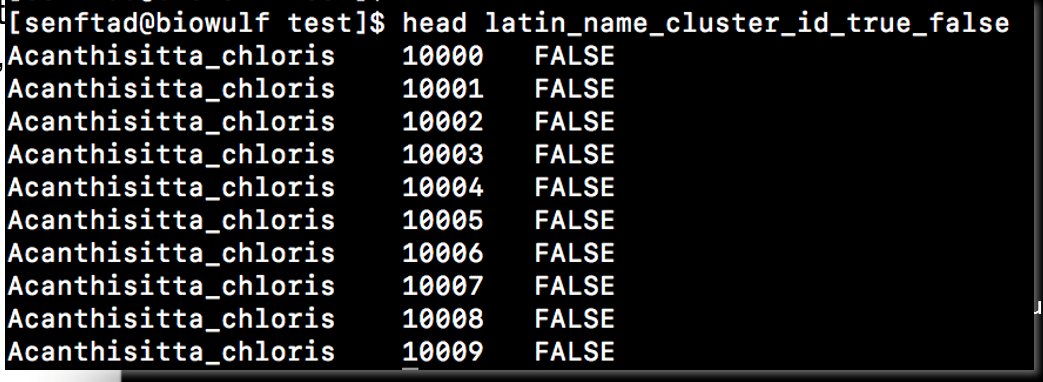

In [7]:
rows = []

# Get rows for each species, cluster, and presence/absence boolean value

In [8]:
species = df2['Latin name'].unique()
species

array(['Acanthisitta chloris', 'Ailuropoda melanoleuca',
       'Daubentonia madagascariensis', 'Galeopterus variegatus',
       'Canis familiaris', 'Equus przewalskii', 'Felis catus',
       'Leptonychotes weddellii', 'Odobenus rosmarus divergens',
       'Panthera tigris altaica', 'Pteropus alecto', 'Ursus maritimus',
       'Dasypus novemcinctus', 'Mustela putorius furo', 'Homo sapiens',
       'Pan paniscus', 'Pan troglodytes', 'Gorilla gorilla',
       'Pongo abelii', 'Nomascus leucogenys', 'Cercocebus atys',
       'Chlorocebus sabaeus', 'Colobus angolensis palliatus',
       'Macaca fascicularis', 'Macaca mulatta', 'Macaca mulatta lasiota',
       'Macaca nemestrina', 'Mandrillus leucophaeus', 'Nasalis larvatus',
       'Papio hamadryas', 'Rhinopithecus roxellana', 'Aotus nancymaae',
       'Saimiri boliviensis', 'Tarsius syrichta', 'Eulemur flavifrons',
       'Eulemur macaco', 'Microcebus murinus', 'Otolemur garnettii',
       'Propithecus coquereli', 'Tupaia chinensis', 'Chin

In [9]:
clusters = df2['Cluster #'].unique()
clusters

array([  204,   205,   206, ..., 15300, 15301, 15302], shape=(15099,))

In [10]:
for organism in species:
    for cluster in clusters:
        rows.append({'Species': organism, 'Cluster': cluster, 'Present': False})

# rows

In [11]:
# Check expected number of rows
expectedRows = len(species)*len(clusters)

In [12]:
# Check that actual number of rows is equal to expected
actualRows = len(rows)

In [13]:
if expectedRows == actualRows:
    print(f"Rejoice! Actual equals expected. \nActual: {actualRows} \tExpected: {expectedRows}")
else:
    print(f"Go ahead and retry that. The actual does not equal expected.\nActual: {actualRows} \tExpected: {expectedRows}")

Rejoice! Actual equals expected. 
Actual: 2883909 	Expected: 2883909


In [14]:
# It is, so populate dataframe with False values for now
dfClusterIDBool = pd.DataFrame(rows)
dfClusterIDBool

,Species,Cluster,Present
0,Acanthisitta chloris,204,False
1,Acanthisitta chloris,205,False
2,Acanthisitta chloris,206,False
3,Acanthisitta chloris,207,False
4,Acanthisitta chloris,208,False
...,...,...,...
2883904,Xenopus tropicalis,15298,False
2883905,Xenopus tropicalis,15299,False
2883906,Xenopus tropicalis,15300,False
2883907,Xenopus tropicalis,15301,False


In [15]:
df2.rename(columns={'Species': 'Species_code', 'Latin name': 'Species','Cluster #': 'Cluster'}, inplace=True)
# df2

In [16]:
dfClusterIDBool['Present'] = dfClusterIDBool[['Species', 'Cluster']].merge(
    df2[['Species', 'Cluster']].drop_duplicates(),
    on=['Species', 'Cluster'],
    how='left',
    indicator=True
)['_merge'].eq('both')


In [17]:
dfClusterIDBool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883909 entries, 0 to 2883908
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Species  object
 1   Cluster  int64 
 2   Present  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 46.8+ MB


In [18]:
import random

random.choice(species)


'Echinops telfairi'

In [19]:
new_df = df2.loc[(df2['Species'] == 'Macaca nemestrina'), ['Species', 'Cluster']]
new_df

,Species,Cluster
39,Macaca nemestrina,211
129,Macaca nemestrina,215
307,Macaca nemestrina,235
399,Macaca nemestrina,236
1269,Macaca nemestrina,721
...,...,...
47223,Macaca nemestrina,14920
47336,Macaca nemestrina,14926
47457,Macaca nemestrina,14929
47458,Macaca nemestrina,14929


In [20]:
df2.loc[(df2['Species']=='Macaca nemestrina') & (df2['Cluster']>14900)]

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species_code,Species,Common name,Class,Order,Estimated evolutionary distance from human (MY),Cluster
47143,ZNF835,mRNA,rna16457,NW_012011034.1,1897782,1898937,+,(KRAB)-ZNFs,YAL-QHL-QYS-RHQ-NSE-FAR-QHQ-QSE-QHQ-NHQ-HSE-QS...,14,14,CGDCGKAFSYCSAFILHQRIH-CPECGKAFSQSVHLTLHQRTH-CH...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14907
47223,ZNF275,mRNA,rna50532,NW_012013322.1,853837,854812,-,(KRAB)-ZNFs,LLQ-GEE-KGQ-VHR-DEK-GGE-REK-QSE-GDK-RGR-RAK,11,11,CKECGDTFRLKVLLVQHQRVH-CGDCGKVFRGVAEFNEHRKSH-CE...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14920
47336,ZNF26,mRNA,rna21880,NW_012011267.1,3722039,3723110,+,KRAB-ZNFs,CQV-ANA-FQV-WQL-LPV-SYV-MQV-RQA-SYI-GQI-RSI-QS...,13,13,CSECGKAFRCKSQLIVHLRIH-CSKCERAFSAKSNLNAHQRVH-CS...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14926
47457,LOC105496537,mRNA,rna34826,NW_012011800.1,19431547,19432464,-,(KRAB)-ZNFs,(ECQ)-(EKQ)-KDQ-VNE-QAV-XXX-VNV-XXX-QSK,9,7,(CKKCGKFFHEKACLTQHKRAH)-(CKGNKCEKPFFEKLKHTQHQR...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14929
47458,LOC105463236,mRNA,rna42216,NW_012012367.1,472188,473175,+,KRAB-ZNFs,XXX-ENQ-QHN-VNE-HAV-VNV-EAK-QVK,8,7,CKYNECGRTFIESLKLNISQRTH-CGECGKTFWEKSNLTQHQRTH-...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14929
47641,ZNF558,mRNA,rna849,NW_012010576.1,12036727,12037462,+,KRAB-ZNFs,TNQ-SYI-DSL-TNS-TSG-KYQ-SSV-NAK-SYV,9,9,CNQCFKVFSTKSNLTQHKRIH-CNQCGKSFSSRSYLTIHKRIH-CN...,Macaca_nemestrina.v1.0,Macaca nemestrina,Southern pig-tailed macaque,Mammalia,Primate,29.1,14935


In [21]:
dfClusterIDBool.loc[(dfClusterIDBool['Species']=='Macaca nemestrina')&(dfClusterIDBool['Present']==True)]

,Species,Cluster,Present
392581,Macaca nemestrina,211,True
392585,Macaca nemestrina,215,True
392605,Macaca nemestrina,235,True
392606,Macaca nemestrina,236,True
393091,Macaca nemestrina,721,True
...,...,...,...
407277,Macaca nemestrina,14907,True
407290,Macaca nemestrina,14920,True
407296,Macaca nemestrina,14926,True
407299,Macaca nemestrina,14929,True


In [22]:
# Count duplicates for all (Species, Cluster) pairs
duplicates = df2.groupby(['Species', 'Cluster']).size()

# Keep only pairs that appear more than once
duplicates = duplicates[duplicates > 1]

# Number of duplicate pairs
num_duplicate_pairs = duplicates.shape[0]

print("Number of duplicate (Species, Cluster) pairs:", num_duplicate_pairs)
print(duplicates)


Number of duplicate (Species, Cluster) pairs: 3547
Species                 Cluster
Ailuropoda melanoleuca  219        2
                        235        2
                        1034       2
                        1231       2
                        1270       2
                                  ..
Xenopus tropicalis      15277      2
                        15279      2
                        15283      2
                        15289      2
                        15295      2
Length: 3547, dtype: int64


### Note:
With this methodology, I exclude all duplicates. By 'duplicate,' I mean all cases such that there are two or more Species-Cluster pairs.

In [23]:
dfClusterIDBool

,Species,Cluster,Present
0,Acanthisitta chloris,204,True
1,Acanthisitta chloris,205,False
2,Acanthisitta chloris,206,False
3,Acanthisitta chloris,207,False
4,Acanthisitta chloris,208,False
...,...,...,...
2883904,Xenopus tropicalis,15298,True
2883905,Xenopus tropicalis,15299,True
2883906,Xenopus tropicalis,15300,True
2883907,Xenopus tropicalis,15301,True


In [24]:
df2.rename(columns={'Estimated evolutionary distance from human (MY)': 'timeFromHuman_MY', 'Common name': 'CommonName'}, inplace=True)

# df2

In [25]:
dfClusterIDBool

,Species,Cluster,Present
0,Acanthisitta chloris,204,True
1,Acanthisitta chloris,205,False
2,Acanthisitta chloris,206,False
3,Acanthisitta chloris,207,False
4,Acanthisitta chloris,208,False
...,...,...,...
2883904,Xenopus tropicalis,15298,True
2883905,Xenopus tropicalis,15299,True
2883906,Xenopus tropicalis,15300,True
2883907,Xenopus tropicalis,15301,True


In [26]:
dfClusterIDBool['Species']

0          Acanthisitta chloris
1          Acanthisitta chloris
2          Acanthisitta chloris
3          Acanthisitta chloris
4          Acanthisitta chloris
                   ...         
2883904      Xenopus tropicalis
2883905      Xenopus tropicalis
2883906      Xenopus tropicalis
2883907      Xenopus tropicalis
2883908      Xenopus tropicalis
Name: Species, Length: 2883909, dtype: object

In [27]:
df2['Species']

0                Acanthisitta chloris
1              Ailuropoda melanoleuca
2        Daubentonia madagascariensis
3              Galeopterus variegatus
4              Ailuropoda melanoleuca
                     ...             
48399                   Xenopus laevi
48400              Xenopus tropicalis
48401              Xenopus tropicalis
48402              Xenopus tropicalis
48403          Zonotrichia albicollis
Name: Species, Length: 48404, dtype: object

In [28]:
# Convert long to wide
df_wide = dfClusterIDBool.pivot(index='Species', columns='Cluster', values='Present').reset_index()
df_wide.columns.name = None

In [29]:
# df_wide

In [30]:
# df_wide.insert(1, 'Order', 'TODO')
# df_wide.insert(2, 'Class', 'TODO')
# df_wide.insert(3, 'CommonName', 'TODO')
# df_wide.insert(4, 'timeFromHuman_MY', 'TODO')


In [31]:
# df_wide

In [32]:
# df_wide['Order'] = 'a'
# df_wide

In [33]:
df2.loc[df2['Species']=='Acanthisitta chloris']['timeFromHuman_MY'][0]

np.float64(320.5)

In [34]:
df2.loc[df2['Species']=='Acanthisitta chloris']

,Label,Type,Gene ID,chrom,start,end,strand,domain configuration,ZNF signature,# of ZNFs,# of ZNFs cannonical,ZNFs,Species_code,Species,CommonName,Class,Order,timeFromHuman_MY,Cluster
0,LOC103802812,mRNA,rna8983,NW_008674413.1,3230,3739,-,KRAB-ZNFs,LNI-(XXX)-CSQ-RHR,4,3,CTECGKRFRLKINLIIHQRSH-(PVCDSVFSNKQHLDLHQSIH)-C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,204
1192,LOC103808815,mRNA,rna14706,NW_008689924.1,4838,5069,-,ZNFs,CWR-RYN-(LSK),3,3,CSDCGKSFVCHSWLVRHQMTH-CSECDKSYRRKDYLLNHQRRH-(C...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,706
15030,LOC103801799,mRNA,rna7967,NW_008671816.1,1036,1606,-,ZNFs,DLT-LSL-DKR-RHK-YSC,5,5,CCECGESFLDKQLFATHQKAH-CSQCKESFSLEVSLILHQKLH-CT...,Acanthisitta_chloris.ASM69581v1,Acanthisitta chloris,Rifleman,Aves,Passeriformes,320.5,3638


In [35]:
# # # Since there are only 191 rows, I'll loop over the [species] array
# # for organism in species:
# #     # print(organism)
# #     df_wide.loc[df_wide['Species'] == organism, ['Order', 
# #                                                  'Class', 
# #                                                  'CommonName', 
# #                                                  'timeFromHuman_NY']] = [(df2.loc[df2['Species']==organism]['Order'][0]), 
# #                                                                          (df2.loc[df2['Species']==organism]['Class'][0]),
# #                                                                          (df2.loc[df2['Species']==organism]['CommonName'][0]),
# #                                                                          (df2.loc[df2['Species']==organism]['timeFromHuman_MY'])
# #                                                                         ]

# # Keep only the relevant columns from df2
# cols_to_add = ['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']

# # Merge data into df_wide
# df_wide = df_wide.merge(df2[cols_to_add], on='Species', how='left')


In [36]:
df2[['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']]

,Species,Order,Class,CommonName,timeFromHuman_MY
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5
2,Daubentonia madagascariensis,Primate,Mammalia,Aye-aye,75.9
3,Galeopterus variegatus,Dermoptera,Mammalia,Sunda flying lemur,81.3
4,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5
...,...,...,...,...,...
48399,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7
48400,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7
48401,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7
48402,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7


In [37]:
# df_wide

In [38]:
print(df_wide.dtypes)
print(df2.dtypes)


Species    object
204          bool
205          bool
206          bool
207          bool
            ...  
15298        bool
15299        bool
15300        bool
15301        bool
15302        bool
Length: 15100, dtype: object
Label                    object
Type                     object
Gene ID                  object
chrom                    object
start                     int64
end                       int64
strand                   object
domain configuration     object
ZNF signature            object
# of ZNFs                 int64
# of ZNFs cannonical      int64
ZNFs                     object
Species_code             object
Species                  object
CommonName               object
Class                    object
Order                    object
timeFromHuman_MY        float64
Cluster                   int64
dtype: object


In [39]:
df_wide = df_wide.merge(
    df2[['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']],
    on='Species',
    how='left'
)
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15297,15298,15299,15300,15301,15302,Order,Class,CommonName,timeFromHuman_MY
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5
1,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5
2,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5
3,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5
4,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48399,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5
48400,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5
48401,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5
48402,Zonotrichia albicollis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,Passeriformes,Aves,White-throated sparrow,320.5


In [40]:
df_wide = df_wide.drop_duplicates()
df_wide

,Species,204,205,206,207,208,209,210,211,212,...,15297,15298,15299,15300,15301,15302,Order,Class,CommonName,timeFromHuman_MY
0,Acanthisitta chloris,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Passeriformes,Aves,Rifleman,320.5
3,Ailuropoda melanoleuca,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,Carnivora,Mammalia,Giant Panda,97.5
305,Alligator mississippiensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Crocodilia,Reptilia,American alligator,320.5
518,Alligator sinensis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Crocodilia,Reptilia,Chinese alligator,320.5
784,Amazona vittata,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Psittaciformes,Aves,Puerto Rican amazon,320.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47563,Vicugna pacos huacaya,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,Artiodactyla,Mammalia,Huacaya alpaca,97.5
47867,Vipera berus berus,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Squamata,Reptilia,Common European viper,320.5
48061,Xenopus laevi,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,Anura,Reptilia,African clawed frog,355.7
48191,Xenopus tropicalis,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,Anura,Reptilia,Western clawed frog,355.7


In [41]:
col0 = df_wide.pop('Order')        # remove the column
df_wide.insert(1, 'Order', col0)   # insert it at position 1 (0-based index)

col1 = df_wide.pop('Class')
df_wide.insert(2, 'Class', col1)

col2 = df_wide.pop('CommonName')
df_wide.insert(3, 'CommonName', col2)

col3 = df_wide.pop('timeFromHuman_MY')
df_wide.insert(4, 'timeFromHuman_MY', col3)

# Check df_wide
df_wide = df_wide.reset_index(drop=True)
df_wide

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,Crocodilia,Reptilia,American alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,Crocodilia,Reptilia,Chinese alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,Psittaciformes,Aves,Puerto Rican amazon,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,Artiodactyla,Mammalia,Huacaya alpaca,97.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,Squamata,Reptilia,Common European viper,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [42]:
# # Save as parquet
# df_wide.to_parquet("dfWide_data.parquet", compression="snappy")

# # Save as CSV and ensure it saved by checking working directory
# df_wide.to_csv("dfWide_data.csv.gz", index=False, compression="gzip")

In [43]:
df_wide['Order'].unique()

array(['Passeriformes', 'Carnivora', 'Crocodilia', 'Psittaciformes',
       'Anseriformes', 'Squamata', 'Caprimulgiformes', 'Primate',
       'Testudines', 'Sphenisciformes', 'Apterygiformes',
       'Accipitriformes', 'Cetacea', 'Gruiformes', 'Artiodactyla',
       'Apodiformes', 'Cariamiformes', 'Cathartiformes', 'Rodentia',
       'Perissodactyla', 'Charadriiformes', 'Pilosa', 'Afrosoricida',
       'Galliformes', 'Coliiformes', 'Columbiformes', 'Soricomorpha',
       'Cuculiformes', 'Cingulata', 'Pelecaniformes', 'Chiroptera',
       'Macroscelidea', 'Erinaceomorpha', 'Eurypygiformes',
       'Falconiformes', 'Procellariiformes', 'Dermoptera', 'Gaviiformes',
       'Coelacanthiformes', 'Leptosomiformes', 'Proboscidea',
       'Diprotodontia', 'Pholidota', 'Mesitornithiformes',
       'Didelphimorphia', 'Anura', 'Ciconiiformes', 'Lagomorpha',
       'Opisthocomiformes', 'Monotremata', 'Tubulidentata', 'Suliformes',
       'Phoenicopteriformes', 'Piciformes', 'Podicipediformes',
    

## To replicate Anna's example, I'm going to isolate the clusters present in platypus, our single Monotremata species, and use that to make the long table. There are 41 clusters present.

In [44]:
df_monotremata = df_wide.loc[df_wide['Order'] == 'Monotremata']
df_monotremata

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
131,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
num_true = (df_monotremata == True).sum().sum()
print("Number of True values:", num_true)


Number of True values: 41


In [46]:
df_monotremata == True

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# List of metadata columns
id_vars = ['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']


In [48]:
# # List of metadata columns
# id_vars = ['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY']


df_long = df_wide.melt(
    id_vars=id_vars,         # columns to keep as-is
    var_name='Cluster',      # name of the new column for the old column headers
    value_name='Present'     # name of the new column for the cell values
)


In [49]:
df_long


,Species,Order,Class,CommonName,timeFromHuman_MY,Cluster,Present
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,204,True
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,204,False
2,Alligator mississippiensis,Crocodilia,Reptilia,American alligator,320.5,204,False
3,Alligator sinensis,Crocodilia,Reptilia,Chinese alligator,320.5,204,False
4,Amazona vittata,Psittaciformes,Aves,Puerto Rican amazon,320.5,204,False
...,...,...,...,...,...,...,...
2883904,Vicugna pacos huacaya,Artiodactyla,Mammalia,Huacaya alpaca,97.5,15302,False
2883905,Vipera berus berus,Squamata,Reptilia,Common European viper,320.5,15302,False
2883906,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7,15302,False
2883907,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,15302,False


In [50]:
# Melt the wide dataframe to long format
df_mono_long = df_monotremata.melt(
    id_vars=['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY'],  # keep metadata
    var_name='Cluster',   # column for cluster IDs
    value_name='Present'  # column for True/False
)

# Convert cluster IDs to numeric (optional)
df_mono_long['Cluster'] = df_mono_long['Cluster']

# Keep only rows where Present is True
dfMonoClusterTrue = df_mono_long[df_mono_long['Present'] == True].reset_index(drop=True)

# # Optional: drop the Present column since all remaining rows are True
# dfMonoClusterTrue = dfMonoClusterTrue.drop(columns=['Present'])

dfMonoClusterTrue


,Species,Order,Class,CommonName,timeFromHuman_MY,Cluster,Present
0,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,706,True
1,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,1046,True
2,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,1216,True
3,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,1290,True
4,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,1454,True
5,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,2137,True
6,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,3627,True
7,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,3956,True
8,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,4221,True
9,Ornithorhynchus anatinus,Monotremata,Mammalia,Platypus,179.2,4609,True


In [51]:
len(dfMonoClusterTrue) * 191 

7831

In [52]:
# len(dfMonoClusterTrue) * 191 

monoClusterCol = dfMonoClusterTrue['Cluster']

monotremeClusterArray = []

for cluster in monoClusterCol:
    monotremeClusterArray.append(cluster)

monotremeClusterArray

[706,
 1046,
 1216,
 1290,
 1454,
 2137,
 3627,
 3956,
 4221,
 4609,
 5264,
 6036,
 6061,
 8380,
 8903,
 9981,
 10898,
 10899,
 10900,
 10901,
 10902,
 10903,
 10904,
 10905,
 10906,
 10907,
 10908,
 10909,
 10910,
 10911,
 10912,
 10913,
 10914,
 10915,
 10916,
 10917,
 10918,
 11467,
 11468,
 13075,
 14844]

In [53]:
df_wide.loc[df_wide['Species']=='Ornithorhynchus anatinus']['timeFromHuman_MY'].item()


179.2

In [54]:
monoRows = []
# i = 0
for organism in species:
    for cluster in monotremeClusterArray:
        evoDist = df_wide.loc[df_wide['Species']==organism]['timeFromHuman_MY'].item()
        present = df_wide.loc[df_wide['Species']==organism][cluster].item()
        # i += 1
        
        monoRows.append({'cluster': cluster, 'species': organism, 'present': present, 'evoDist': evoDist})

# monoRows
# print(i)

In [55]:
len(monoRows)

7831

In [56]:
# It is, so populate dataframe with False values for now
dfAllSpecies_MonotremataCluster41 = pd.DataFrame(monoRows)
dfAllSpecies_MonotremataCluster41

,cluster,species,present,evoDist
0,706,Acanthisitta chloris,True,320.5
1,1046,Acanthisitta chloris,False,320.5
2,1216,Acanthisitta chloris,False,320.5
3,1290,Acanthisitta chloris,False,320.5
4,1454,Acanthisitta chloris,False,320.5
...,...,...,...,...
7826,10918,Xenopus tropicalis,False,355.7
7827,11467,Xenopus tropicalis,False,355.7
7828,11468,Xenopus tropicalis,False,355.7
7829,13075,Xenopus tropicalis,False,355.7


In [57]:
dfMono41ClustAll191Species = dfAllSpecies_MonotremataCluster41.sort_values(by='evoDist', ascending=False)
dfMono41ClustAll191Species


,cluster,species,present,evoDist
7726,10900,Latimeria chalumnae,False,411.9
7727,10901,Latimeria chalumnae,False,411.9
7728,10902,Latimeria chalumnae,False,411.9
7729,10903,Latimeria chalumnae,False,411.9
7730,10904,Latimeria chalumnae,False,411.9
...,...,...,...,...
582,4221,Homo sapiens,True,0.0
590,10898,Homo sapiens,False,0.0
591,10899,Homo sapiens,False,0.0
592,10900,Homo sapiens,False,0.0


In [58]:
# # Save as parquet
# dfMono41ClustAll191Species.to_parquet("dfMono41ClustAll191Species.parquet", compression="snappy")

# # Save as CSV and ensure it saved by checking working directory
# dfMono41ClustAll191Species.to_csv("dfMono41ClustAll191Species.csv.gz", index=False, compression="gzip")

In [59]:
ls -lh

total 447M
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  26K Oct 17 21:04  41586_2017_BFnature21683_MOESM102_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 9.3M Oct 17 21:04  41586_2017_BFnature21683_MOESM103_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 359K Oct 17 21:04  41586_2017_BFnature21683_MOESM104_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 142K Oct 17 21:04  41586_2017_BFnature21683_MOESM105_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  33K Oct 17 21:04  41586_2017_BFnature21683_MOESM106_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 360K Oct 17 21:04  41586_2017_BFnature21683_MOESM107_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 416K Oct 17 21:04  41586_2017_BFnature21683_MOESM108_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 420K Oct 17 21:04  41586_2017_BFnature21683_MOESM109_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 325K Oct 17 21:04  41586_2017_BFnature21683_MOESM110_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 7.0M Oct 17 21:04  41586_2017_BF

In [60]:
cluster_str = """
4221
8903
1046
11467
1454
14844
9981
5264
13075
3956
2137
1216
4609
8380
6036
706
11468
6061
1290
3627
10917
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10918
"""


In [61]:
cluster_order = [int(x) for x in cluster_str.strip().split('\n')]
cluster_order

[4221,
 8903,
 1046,
 11467,
 1454,
 14844,
 9981,
 5264,
 13075,
 3956,
 2137,
 1216,
 4609,
 8380,
 6036,
 706,
 11468,
 6061,
 1290,
 3627,
 10917,
 10898,
 10899,
 10900,
 10901,
 10902,
 10903,
 10904,
 10905,
 10906,
 10907,
 10908,
 10909,
 10910,
 10911,
 10912,
 10913,
 10914,
 10915,
 10916,
 10918]

In [62]:
len(cluster_order)

41

In [63]:
dfMono41ClustAll191Species['cluster'] = pd.Categorical(dfMono41ClustAll191Species['cluster'], categories=cluster_order, ordered=True)

df_sorted = dfMono41ClustAll191Species.sort_values(by=['evoDist', 'species', 'cluster'], ascending=[False, True, True]).reset_index(drop=True)


In [64]:
df_sorted

,cluster,species,present,evoDist
0,4221,Latimeria chalumnae,False,411.9
1,8903,Latimeria chalumnae,False,411.9
2,1046,Latimeria chalumnae,False,411.9
3,11467,Latimeria chalumnae,False,411.9
4,1454,Latimeria chalumnae,False,411.9
...,...,...,...,...
7826,10913,Homo sapiens,False,0.0
7827,10914,Homo sapiens,False,0.0
7828,10915,Homo sapiens,False,0.0
7829,10916,Homo sapiens,False,0.0


In [65]:
num_nan = df_sorted['cluster'].isna().sum()
print(num_nan)

0


In [66]:
# Save as parquet
# df_sorted.to_parquet("dfMono41ClustAll191Species_sorted.parquet", compression="snappy")

# Save as CSV and ensure it saved by checking working directory
# df_sorted.to_csv("dfMono41ClustAll191Species_Allsorted.csv.gz", index=False, compression="gzip")

In [67]:
ls -lh

total 447M
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  26K Oct 17 21:04  41586_2017_BFnature21683_MOESM102_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 9.3M Oct 17 21:04  41586_2017_BFnature21683_MOESM103_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 359K Oct 17 21:04  41586_2017_BFnature21683_MOESM104_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 142K Oct 17 21:04  41586_2017_BFnature21683_MOESM105_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu  33K Oct 17 21:04  41586_2017_BFnature21683_MOESM106_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 360K Oct 17 21:04  41586_2017_BFnature21683_MOESM107_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 416K Oct 17 21:04  41586_2017_BFnature21683_MOESM108_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 420K Oct 17 21:04  41586_2017_BFnature21683_MOESM109_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 325K Oct 17 21:04  41586_2017_BFnature21683_MOESM110_ESM.xlsx*
-rwxr-xr-x 1 danie_ubuntu danie_ubuntu 7.0M Oct 17 21:04  41586_2017_BF

In [68]:
df_sorted.loc[df_sorted['evoDist']==355.7].sort_values(by=['species'], ascending=True)

,cluster,species,present,evoDist
41,4221,Nanorana parkeri,False,355.7
64,10900,Nanorana parkeri,False,355.7
65,10901,Nanorana parkeri,False,355.7
66,10902,Nanorana parkeri,False,355.7
67,10903,Nanorana parkeri,False,355.7
...,...,...,...,...
138,706,Xenopus tropicalis,False,355.7
139,11468,Xenopus tropicalis,False,355.7
140,6061,Xenopus tropicalis,False,355.7
132,3956,Xenopus tropicalis,False,355.7


In [69]:
# Find the order of most cluster TRUE in df to least
clusterTfreq = []


for cluster in monotremeClusterArray:
    freq = dfAllSpecies_MonotremataCluster41.loc[(dfAllSpecies_MonotremataCluster41['cluster'] == cluster) & (dfAllSpecies_MonotremataCluster41['present'] == True)].shape[0]
    clusterTfreq.append({'Cluster': cluster, 'Frequency_T': freq})


In [70]:
clusterTfreq

[{'Cluster': 706, 'Frequency_T': 51},
 {'Cluster': 1046, 'Frequency_T': 112},
 {'Cluster': 1216, 'Frequency_T': 97},
 {'Cluster': 1290, 'Frequency_T': 21},
 {'Cluster': 1454, 'Frequency_T': 111},
 {'Cluster': 2137, 'Frequency_T': 99},
 {'Cluster': 3627, 'Frequency_T': 21},
 {'Cluster': 3956, 'Frequency_T': 104},
 {'Cluster': 4221, 'Frequency_T': 148},
 {'Cluster': 4609, 'Frequency_T': 78},
 {'Cluster': 5264, 'Frequency_T': 107},
 {'Cluster': 6036, 'Frequency_T': 58},
 {'Cluster': 6061, 'Frequency_T': 31},
 {'Cluster': 8380, 'Frequency_T': 72},
 {'Cluster': 8903, 'Frequency_T': 115},
 {'Cluster': 9981, 'Frequency_T': 108},
 {'Cluster': 10898, 'Frequency_T': 1},
 {'Cluster': 10899, 'Frequency_T': 1},
 {'Cluster': 10900, 'Frequency_T': 1},
 {'Cluster': 10901, 'Frequency_T': 1},
 {'Cluster': 10902, 'Frequency_T': 1},
 {'Cluster': 10903, 'Frequency_T': 1},
 {'Cluster': 10904, 'Frequency_T': 1},
 {'Cluster': 10905, 'Frequency_T': 1},
 {'Cluster': 10906, 'Frequency_T': 1},
 {'Cluster': 10907,

In [71]:
dfMonoClusterSortNew = pd.DataFrame(clusterTfreq)

In [72]:
# dfMonoClusterSortNew = pd.DataFrame(clusterTfreq)

dfMonoClusterSortNew = dfMonoClusterSortNew.sort_values(by=['Frequency_T', 'Cluster'], ascending=[False, True])

In [73]:
dfMonoClusterSortNew

,Cluster,Frequency_T
8,4221,148
14,8903,115
1,1046,112
37,11467,112
4,1454,111
40,14844,111
15,9981,108
10,5264,107
39,13075,107
7,3956,104


In [74]:
for i in range(len(cluster_order)):
    print(cluster_order[i], dfMonoClusterSortNew.iloc[i,0])
    if cluster_order[i] == dfMonoClusterSortNew.iloc[i,0]:
        print(f"Cluster in row {i} matches!")
    else:
        print("NO MATCH HERE")

4221 4221
Cluster in row 0 matches!
8903 8903
Cluster in row 1 matches!
1046 1046
Cluster in row 2 matches!
11467 11467
Cluster in row 3 matches!
1454 1454
Cluster in row 4 matches!
14844 14844
Cluster in row 5 matches!
9981 9981
Cluster in row 6 matches!
5264 5264
Cluster in row 7 matches!
13075 13075
Cluster in row 8 matches!
3956 3956
Cluster in row 9 matches!
2137 2137
Cluster in row 10 matches!
1216 1216
Cluster in row 11 matches!
4609 4609
Cluster in row 12 matches!
8380 8380
Cluster in row 13 matches!
6036 6036
Cluster in row 14 matches!
706 706
Cluster in row 15 matches!
11468 11468
Cluster in row 16 matches!
6061 6061
Cluster in row 17 matches!
1290 1290
Cluster in row 18 matches!
3627 3627
Cluster in row 19 matches!
10917 10917
Cluster in row 20 matches!
10898 10898
Cluster in row 21 matches!
10899 10899
Cluster in row 22 matches!
10900 10900
Cluster in row 23 matches!
10901 10901
Cluster in row 24 matches!
10902 10902
Cluster in row 25 matches!
10903 10903
Cluster in row 26 

### Attempt to streamline the code for platypus in a single cell to be used in a for loop to iterate over all species

In [75]:
# df_wide['Species'].unique()

In [76]:
# df_mus_musculus = df_wide.loc[df_wide['Species'] == 'Mus musculus']
# df_mus_musculus

# num_true = (df_mus_musculus == True).sum().sum()
# print("Number of TRUE values in df_mus_musculus:", num_true)

# # Melt the wide dataframe to long format
# df_mus_musculus_long = df_mus_musculus.melt(
#     id_vars=['Species', 'Order', 'Class', 'CommonName', 'timeFromHuman_MY'],  # keep metadata
#     var_name='Cluster',   # column for cluster IDs
#     value_name='Present'  # column for True/False
# )

# # Convert cluster IDs to numeric (optional)
# df_mus_musculus_long['Cluster'] = df_mus_musculus_long['Cluster']

# # Keep only rows where Present is True
# df_mus_musculus_True = df_mus_musculus_long[df_mus_musculus_long['Present'] == True].reset_index(drop=True)

# # # Optional: drop the Present column since all remaining rows are True
# # dfMonoClusterTrue = dfMonoClusterTrue.drop(columns=['Present'])

# print(df_mus_musculus_True, type(df_mus_musculus_True))

# print("Expected length of df for all species: ", len(df_mus_musculus_True) * 191) 

# musMusculusClusterCol = df_mus_musculus_True['Cluster']

# musMusculusClusterArray = []

# for cluster in musMusculusClusterCol:
#     musMusculusClusterArray.append(cluster)

# print(musMusculusClusterArray)

# musMusculusRows = []
# # i = 0
# for organism in species:
#     for cluster in musMusculusClusterArray:
#         evoDist = df_wide.loc[df_wide['Species']==organism]['timeFromHuman_MY'].item()
#         present = df_wide.loc[df_wide['Species']==organism][cluster].item()
#         # i += 1
        
#         musMusculusRows.append({'cluster': cluster, 'species': organism, 'present': present, 'evoDist': evoDist})
#         print(musMusculusRows)

# print(musMusculusRows)


In [77]:
df_wide

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,Crocodilia,Reptilia,American alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,Crocodilia,Reptilia,Chinese alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,Psittaciformes,Aves,Puerto Rican amazon,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,Artiodactyla,Mammalia,Huacaya alpaca,97.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,Squamata,Reptilia,Common European viper,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [78]:
import time

start = time.time()


# Step 1: subset mouse clusters
mouse_clusters = df_wide.loc[df_wide['Species'] == 'Mus musculus', df_wide.columns[5:]].iloc[0]
mouse_clusters_true = mouse_clusters[mouse_clusters].index

# Step 2: subset only those columns for all species
sub = df_wide[['Species', 'timeFromHuman_MY'] + mouse_clusters_true.tolist()].copy()

# Step 3: melt to long format
df_long = sub.melt(
    id_vars=['Species', 'timeFromHuman_MY'],
    var_name='cluster',
    value_name='present'
)

# Get frequency of clusters in df_long
clusterTfreq = []
    
for cluster in df_long['cluster'].unique():
    freq = df_long.loc[(df_long['cluster'] == cluster) & (df_long['present'] == True)].shape[0]
    clusterTfreq.append({'Cluster': cluster, 'Frequency_T': freq})

dfMusClusterSortNew = pd.DataFrame(clusterTfreq)

dfMusClusterSortNew = dfMusClusterSortNew.sort_values(by=['Frequency_T', 'Cluster'], ascending=[False, True])

# Properly sort the df
cluster_order = dfMusClusterSortNew['Cluster'].tolist()

df_long['cluster'] = pd.Categorical(df_long['cluster'], categories=cluster_order, ordered=True)

df_mus_musculus_sorted = df_long.sort_values(by=['timeFromHuman_MY', 'Species', 'cluster'], ascending=[False, True, True]).reset_index(drop=True)



end = time.time()

print(f"Execution time: {end - start:.4f} seconds")

Execution time: 2.4434 seconds


In [79]:
df_mus_musculus_sorted

,Species,timeFromHuman_MY,cluster,present
0,Latimeria chalumnae,411.9,4221,False
1,Latimeria chalumnae,411.9,8903,False
2,Latimeria chalumnae,411.9,1046,False
3,Latimeria chalumnae,411.9,11467,False
4,Latimeria chalumnae,411.9,1454,False
...,...,...,...,...
86518,Homo sapiens,0.0,8698,False
86519,Homo sapiens,0.0,8699,False
86520,Homo sapiens,0.0,8700,False
86521,Homo sapiens,0.0,8702,False


In [80]:
import time
start = time.perf_counter()

# --- Step 1: Select Mus musculus clusters that are True ---
mouse_row = df_wide.loc[df_wide['Species'] == 'Mus musculus'].iloc[0]
mouse_clusters_true = mouse_row[mouse_row.index[5:]][mouse_row.iloc[5:]].index  # skip metadata cols

# --- Step 2: Subset only those columns for all species ---
sub = df_wide[['Species', 'timeFromHuman_MY'] + mouse_clusters_true.tolist()]

# --- Step 3: Melt to long format (wide → long) ---
df_long = sub.melt(
    id_vars=['Species', 'timeFromHuman_MY'],
    var_name='cluster',
    value_name='present'
)

# --- Step 4: Compute frequency of True values per cluster (vectorized) ---
cluster_freq = (
    df_long[df_long['present']]
    .groupby('cluster', as_index=False)
    .size()
    .rename(columns={'size': 'Frequency_T'})
    .sort_values(by=['Frequency_T', 'cluster'], ascending=[False, True])
)

# --- Step 5: Apply sorted cluster order to df_long efficiently ---
df_long['cluster'] = pd.Categorical(
    df_long['cluster'],
    categories=cluster_freq['cluster'],
    ordered=True
)

# --- Step 6: Sort final dataframe by evo distance, species, and cluster ---
df_mus_musculus_sorted = df_long.sort_values(
    by=['timeFromHuman_MY', 'Species', 'cluster'],
    ascending=[False, True, True],
    ignore_index=True
)

end = time.perf_counter()
print(f"Execution time: {end - start:.4f} seconds")


Execution time: 0.0724 seconds


In [81]:
df_mus_musculus_sorted

,Species,timeFromHuman_MY,cluster,present
0,Latimeria chalumnae,411.9,4221,False
1,Latimeria chalumnae,411.9,8903,False
2,Latimeria chalumnae,411.9,1046,False
3,Latimeria chalumnae,411.9,11467,False
4,Latimeria chalumnae,411.9,1454,False
...,...,...,...,...
86518,Homo sapiens,0.0,8698,False
86519,Homo sapiens,0.0,8699,False
86520,Homo sapiens,0.0,8700,False
86521,Homo sapiens,0.0,8702,False


In [82]:
# Platypus attempt
import time
start = time.perf_counter()

# --- Step 1: Select Mus musculus clusters that are True ---
mouse_row = df_wide.loc[df_wide['Species'] == 'Ornithorhynchus anatinus'].iloc[0]
mouse_clusters_true = mouse_row[mouse_row.index[5:]][mouse_row.iloc[5:]].index  # skip metadata cols

# --- Step 2: Subset only those columns for all species ---
sub = df_wide[['Species', 'timeFromHuman_MY'] + mouse_clusters_true.tolist()]

# --- Step 3: Melt to long format (wide → long) ---
df_long = sub.melt(
    id_vars=['Species', 'timeFromHuman_MY'],
    var_name='cluster',
    value_name='present'
)

# --- Step 4: Compute frequency of True values per cluster (vectorized) ---
cluster_freq = (
    df_long[df_long['present']]
    .groupby('cluster', as_index=False)
    .size()
    .rename(columns={'size': 'Frequency_T'})
    .sort_values(by=['Frequency_T', 'cluster'], ascending=[False, True])
)

# --- Step 5: Apply sorted cluster order to df_long efficiently ---
df_long['cluster'] = pd.Categorical(
    df_long['cluster'],
    categories=cluster_freq['cluster'],
    ordered=True
)

# --- Step 6: Sort final dataframe by evo distance, species, and cluster ---
df_ornithorhynchus_anatinus_sorted = df_long.sort_values(
    by=['timeFromHuman_MY', 'Species', 'cluster'],
    ascending=[False, True, True],
    ignore_index=True
)

end = time.perf_counter()
print(f"Execution time: {end - start:.4f} seconds")


Execution time: 0.0236 seconds


In [83]:
df_ornithorhynchus_anatinus_sorted

,Species,timeFromHuman_MY,cluster,present
0,Latimeria chalumnae,411.9,4221,False
1,Latimeria chalumnae,411.9,8903,False
2,Latimeria chalumnae,411.9,1046,False
3,Latimeria chalumnae,411.9,11467,False
4,Latimeria chalumnae,411.9,1454,False
...,...,...,...,...
7826,Homo sapiens,0.0,10913,False
7827,Homo sapiens,0.0,10914,False
7828,Homo sapiens,0.0,10915,False
7829,Homo sapiens,0.0,10916,False


In [84]:
# df_mus_musculus_sorted.to_csv("df_mus_musculus_sorted.csv", index=False)
# df_ornithorhynchus_anatinus_sorted.to_csv("df_ornithorhynchus_anatinus_sorted.csv", index=False)


In [85]:
# # Loop attempt

# species_KZFP_cluster_conservation_df_dict = {}

# for organism in species:
#     start = time.perf_counter()
#     print(f"Getting sorted, analyzed pandas dataframe for {organism}.")
    
#     # --- Step 1: Select species clusters that are True ---
#     species_row = df_wide.loc[df_wide['Species'] == organism].iloc[0]
#     species_clusters_true = species_row[species_row.index[5:]][species_row.iloc[5:]].index  # skip metadata cols
    
#     # --- Step 2: Subset only those columns for all species ---
#     sub = df_wide[['Species', 'timeFromHuman_MY'] + species_clusters_true.tolist()]
    
#     # --- Step 3: Melt to long format (wide → long) ---
#     df_long = sub.melt(
#         id_vars=['Species', 'timeFromHuman_MY'],
#         var_name='cluster',
#         value_name='present'
#     )
    
#     # --- Step 4: Compute frequency of True values per cluster (vectorized) ---
#     cluster_freq = (
#         df_long[df_long['present']]
#         .groupby('cluster', as_index=False)
#         .size()
#         .rename(columns={'size': 'Frequency_T'})
#         .sort_values(by=['Frequency_T', 'cluster'], ascending=[False, True])
#     )
    
#     # --- Step 5: Apply sorted cluster order to df_long efficiently ---
#     df_long['cluster'] = pd.Categorical(
#         df_long['cluster'],
#         categories=cluster_freq['cluster'],
#         ordered=True
#     )
    
#     # --- Step 6: Sort final dataframe by evo distance, species, and cluster ---
#     df_sorted = df_long.sort_values(
#         by=['timeFromHuman_MY', 'Species', 'cluster'],
#         ascending=[False, True, True],
#         ignore_index=True
#     )

#     species_KZFP_cluster_conservation_df_dict[organism] = df_sorted
    
#     df_sorted.to_csv(f"df_{organism}_sorted.csv", index=False)

    
#     end = time.perf_counter()
#     print(f"Execution time: {end - start:.4f} seconds")

In [86]:
# species_KZFP_cluster_conservation_df_dict

In [87]:
df_wide

,Species,Order,Class,CommonName,timeFromHuman_MY,204,205,206,207,208,...,15293,15294,15295,15296,15297,15298,15299,15300,15301,15302
0,Acanthisitta chloris,Passeriformes,Aves,Rifleman,320.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ailuropoda melanoleuca,Carnivora,Mammalia,Giant Panda,97.5,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Alligator mississippiensis,Crocodilia,Reptilia,American alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alligator sinensis,Crocodilia,Reptilia,Chinese alligator,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Amazona vittata,Psittaciformes,Aves,Puerto Rican amazon,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vicugna pacos huacaya,Artiodactyla,Mammalia,Huacaya alpaca,97.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,Vipera berus berus,Squamata,Reptilia,Common European viper,320.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,Xenopus laevi,Anura,Reptilia,African clawed frog,355.7,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
189,Xenopus tropicalis,Anura,Reptilia,Western clawed frog,355.7,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [88]:
df_wide.to_csv("df_wide.csv", index=False)
